In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pprint
import time

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# GridSearchCV: Wird verwendet, um die besten Hyperparameter für ein Modell zu finden. Nutzt Cross-Validation, um die beste Kombination zu evaluieren.
# RandomizedSearchCV: Ähnlich wie GridSearchCV, aber anstatt alle Kombinationen zu testen, wählt es zufällig eine begrenzte Anzahl von Kombinationen aus.
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
# One-Hot-Encoding: Wandelt kategoriale (nominale) Variablen in numerische Form um, indem für jede Kategorie eine eigene Spalte erstellt wird.
# MinMaxScaler transformiert jeden Wert so, dass der kleinste Wert auf 0 und der größte Wert auf 1 skaliert wird, während alle anderen Wertedazwischen liegen.
# StandardScaler: Skaliert die Daten so, dass sie eine Normalverteilung haben (Z-Transformation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score



### Einlesen des Datensatzes und konvertierung in ein pandas DataFrame

#### 🚀 Vorteile: Warum dieser Ansatz gut ist

-   Bessere Datenvorbereitung  
    Pandas bietet leistungsstarke Funktionen zur Datenbereinigung, Feature Engineering und Transformation, die in NumPy umständlicher wären.  
    Du kannst leicht fehlende Werte behandeln, Spalten umbenennen, Filter setzen usw.  

-   Mehr Flexibilität & Lesbarkeit  
    Pandas-Operationen wie `.groupby()`, `.merge()`, `.apply()` sind intuitiver und einfacher zu schreiben als NumPy-Operationen.  
    Der Code bleibt verständlicher.  

-   Skalierung & Transformation mit Sklearn funktioniert direkt  
    Viele `sklearn.preprocessing`-Methoden (z. B. `MinMaxScaler`, `StandardScaler`) akzeptieren direkt DataFrames und NumPy-Arrays.  
    Die Konvertierung geschieht meist erst ganz am Ende, wenn das Modell trainiert wird.  


In [33]:
data = pd.read_csv(r"D:\Git-GitHub\Repositories\data-science-track\data-science-track\03-machine-learning\resources\Telco-Customer-Churn.csv")
df_raw = pd.DataFrame(data)

### Erstellen eine Kopie des Dataframes

#### 🚀 Vorteile: Warum eine Kopie des Original-DataFrames sinnvoll ist  


-   Schutz vor unbeabsichtigten Änderungen  
Wenn du direkt mit dem Original-DataFrame arbeitest, können Änderungen unbemerkt übernommen werden.  
Eine Kopie stellt sicher, dass die ursprünglichen Daten erhalten bleiben.  

-   Vergleich von Original- und transformierten Daten  
Mit einer Kopie kannst du jederzeit prüfen, wie sich Transformationen oder Bereinigungen auf die Daten ausgewirkt haben.  
Das erleichtert Debugging und Nachvollziehbarkeit.  

-   Vermeidung von Problemen durch "Views" in Pandas  
Manche Pandas-Operationen geben nur eine Ansicht (`View`) auf die Daten zurück, nicht eine echte Kopie.  
Dadurch können ungewollte Änderungen im Original-DataFrame passieren, was zu schwer auffindbaren Fehlern führen kann.  

-   Mehr Sicherheit in Machine Learning Pipelines  
Beim Feature Engineering oder Skalieren kann eine Kopie helfen, um Daten vor Manipulationen zu schützen,  
falls mehrere Schritte nacheinander ausgeführt werden.  

In [34]:
df = df_raw.copy(True)

### Erste Sichtung

In diesem Schritt verschaffen wir uns einen ersten Überblick über den Datensatz.


In [35]:
# Zeige die ersten fünf Zeilen des Datensatzes
df.head()

# Überblick über die Spalten und deren Datentypen
df.info()

# Statistische Zusammenfassung der numerischen Spalten
df.describe()

# Prüfen auf fehlende Werte in jeder Spalte
print("Fehlende Werte pro Spalte:")
print(df.isna().sum())

# Prüfen auf doppelte Zeilen
print("Duplikate im Datensatz:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Datenbereinigung (Pandas only!)

In [29]:
# Leerzeichen als NaN behandeln
df.replace(" ", np.nan, inplace=True)

# Optional: bestimmte Spalten entfernen oder Datentypen anpassen
# df.drop(columns=["customerID"], inplace=True)  # Beispiel

# String-Target in numerisch umwandeln
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Fehlende Werte behandeln
df.dropna(inplace=True)  # oder df.fillna(method='ffill') etc.


### Kodierung kategorialer Variablen

Methoden:

- One-Hot Encoding: Für nominale Daten (keine natürliche Reihenfolge, z. B. Farben, Städte).
- Label Encoding: Für ordinale Daten (natürliche Reihenfolge, z. B. Schulabschluss: "Bachelor", "Master", "PhD").

In [ ]:
# One-Hot-Encoding aller kategorialen Features
df_encoded = pd.get_dummies(df, drop_first=True)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop("Churn", axis=1))

### Features und Zielvariable definieren

In [ ]:
X = X_scaled  # oder: df_encoded.drop("Churn", axis=1).values
y = df_encoded["Churn"].values


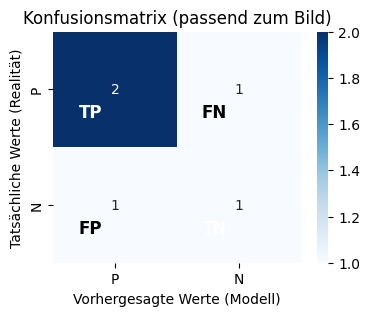

In [38]:
# Neue Daten basierend auf dem Bild (5 Werte)
y_true_img = ['P', 'N', 'P', 'P', 'N']  # Tatsächliche Werte
y_pred_img = ['P', 'P', 'N', 'P', 'N']  # Modell-Vorhersagen

# Konfusionsmatrix für die 5 Werte berechnen
cm_img = confusion_matrix(y_true_img, y_pred_img, labels=['P', 'N'])

# Visualisierung der Konfusionsmatrix passend zum Bild
plt.figure(figsize=(4,3))
ax = sns.heatmap(cm_img, annot=True, fmt="d", cmap="Blues", xticklabels=['P', 'N'], yticklabels=['P', 'N'])

# Beschriftungen für die Matrix-Kategorien (basierend auf 5 Werten)
plt.text(0.3, 0.7, "TP", fontsize=12, color="white", weight="bold", ha='center', va='center')  # True Positive
plt.text(1.3, 0.7, "FN", fontsize=12, color="black", weight="bold", ha='center', va='center')  # False Negative
plt.text(0.3, 1.7, "FP", fontsize=12, color="black", weight="bold", ha='center', va='center')  # False Positive
plt.text(1.3, 1.7, "TN", fontsize=12, color="white", weight="bold", ha='center', va='center')  # True Negative

plt.xlabel("Vorhergesagte Werte (Modell)")
plt.ylabel("Tatsächliche Werte (Realität)")
plt.title("Konfusionsmatrix (passend zum Bild)")

# Plot anzeigen
plt.show()




In [40]:
from sklearn.metrics import precision_score

# Precision berechnen
precision = precision_score(y_true_img, y_pred_img, pos_label='P')

# Ergebnis ausgeben
precision


0.6666666666666666

NameError: name 'recall' is not defined

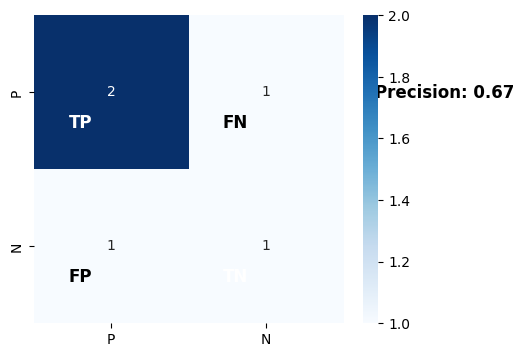

In [42]:
# Neue Visualisierung mit F1-Score, Precision und Recall im Bild

plt.figure(figsize=(5,4))
ax = sns.heatmap(cm_img, annot=True, fmt="d", cmap="Blues", xticklabels=['P', 'N'], yticklabels=['P', 'N'])

# Beschriftungen für die Matrix-Kategorien
plt.text(0.3, 0.7, "TP", fontsize=12, color="white", weight="bold", ha='center', va='center')  # True Positive
plt.text(1.3, 0.7, "FN", fontsize=12, color="black", weight="bold", ha='center', va='center')  # False Negative
plt.text(0.3, 1.7, "FP", fontsize=12, color="black", weight="bold", ha='center', va='center')  # False Positive
plt.text(1.3, 1.7, "TN", fontsize=12, color="white", weight="bold", ha='center', va='center')  # True Negative

# Zusätzliche Metriken ins Bild schreiben
plt.text(2.2, 0.5, f"Precision: {precision:.2f}", fontsize=12, color="black", weight="bold", ha='left', va='center')
plt.text(2.2, 1.0, f"Recall: {recall:.2f}", fontsize=12, color="black", weight="bold", ha='left', va='center')
plt.text(2.2, 1.5, f"F1-Score: {f1:.2f}", fontsize=12, color="black", weight="bold", ha='left', va='center')

plt.xlabel("Vorhergesagte Werte (Modell)")
plt.ylabel("Tatsächliche Werte (Realität)")
plt.title("Konfusionsmatrix mit Precision, Recall & F1")

# Plot anzeigen
plt.show()
